### New Data set:Hotel Booking dataset from kagle
**Dataset Overview**
Total Rows: 119390
 
Total Columns: 32
 
Data Types:(columns)


**numeric type:** 20


**object type:** 12


**Features**


hotel – Type of hotel (e.g., "Resort Hotel" or "City Hotel").


is_canceled – Whether the booking was canceled (0 = No, 1 = Yes).


lead_time – Number of days between booking and arrival.


arrival_date_year – Year of arrival.


arrival_date_month – Month of arrival.


arrival_date_week_number – Week number of the year for arrival.


arrival_date_day_of_month – Day of the month of arrival.


stays_in_weekend_nights – Number of weekend nights (Saturday & Sunday).


stays_in_week_nights – Number of weekday nights (Monday–Friday).


adults – Number of adults in the booking.


children – Number of children in the booking.


babies – Number of babies in the booking.


meal – Type of meal booked (e.g., BB = Bed & Breakfast, HB = Half Board).


country – Country of origin of the customer.


market_segment – Market segment category (e.g., Direct, Corporate, Online TA).


distribution_channel – Booking distribution channel (e.g., Direct, TA/TO).


is_repeated_guest – Whether the customer is a returning guest (0 = No, 1 = Yes).


previous_cancellations – Number of previous bookings canceled by the customer.


previous_bookings_not_canceled – Number of previous bookings not canceled.


reserved_room_type – Room type originally reserved.


assigned_room_type – Room type assigned at check-in (may differ from reserved).


booking_changes – Number of changes made to the booking.


deposit_type – Type of deposit made (No Deposit, Non-Refundable, or Refundable).


agent – ID of the travel agent that made the booking (NaN if none).


company – ID of the company that made the booking (NaN if none).


days_in_waiting_list – Number of days the booking was on the waiting list.


customer_type – Type of booking (Transient, Contract, Group, etc.).


adr – Average Daily Rate (total revenue divided by number of nights).


required_car_parking_spaces – Number of parking spaces requested.


total_of_special_requests – Number of special requests made by the customer.


reservation_status – Final status of the booking (Check-Out, Canceled, No-Show).


reservation_status_date – Date when the reservation status was updated.


In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [13]:
df=pd.read_csv('hotel_bookings.csv')

In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [48]:
col=df.columns
col

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [70]:
print(df.dtypes.value_counts())

int64      16
object     12
float64     4
Name: count, dtype: int64


In [80]:
df.isna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [98]:
data=pd.DataFrame(df)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Missing Values**

In [ ]:
data.isna().sum()

In [125]:
data.fillna(data.mode().iloc[0], inplace=True)


In [129]:
data.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,9.0,40.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,9.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,40.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,40.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Convert to numeric and date_time formats**

In [135]:
data['arrival_date_year'] = data['arrival_date_year'].astype(int)
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])


In [142]:
data.duplicated().sum()

32014

In [144]:
data.drop_duplicates(inplace=True)

In [150]:
data.duplicated().sum()

0

In [152]:
# One-Hot Encoding for categorical variables
data = pd.get_dummies(data, columns=['hotel', 'meal', 'market_segment', 'distribution_channel', 'customer_type', 'deposit_type'], drop_first=True)

**Scaling**

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adr']
data[num_cols] = scaler.fit_transform(data[num_cols])


**Feature Engineering**

In [158]:
# total stays
data['total_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
#  a booking includes children
data['has_children'] = data['children'].apply(lambda x: 1 if x > 0 else 0)


In [160]:
data

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,deposit_type_Non Refund,deposit_type_Refundable,total_stay,has_children
0,0,0.464043,2015,July,27,1,0.000000,0.00,2,0.0,...,False,False,False,False,True,False,False,False,0.000000,0
1,0,1.000000,2015,July,27,1,0.000000,0.00,2,0.0,...,False,False,False,False,True,False,False,False,0.000000,0
2,0,0.009498,2015,July,27,1,0.000000,0.02,1,0.0,...,False,False,False,False,True,False,False,False,0.020000,0
3,0,0.017639,2015,July,27,1,0.000000,0.02,1,0.0,...,False,False,False,False,True,False,False,False,0.020000,0
4,0,0.018996,2015,July,27,1,0.000000,0.04,2,0.0,...,False,True,False,False,True,False,False,False,0.040000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.031208,2017,August,35,30,0.105263,0.10,2,0.0,...,False,True,False,False,True,False,False,False,0.205263,0
119386,0,0.138399,2017,August,35,31,0.105263,0.10,3,0.0,...,False,True,False,False,True,False,False,False,0.205263,0
119387,0,0.046133,2017,August,35,31,0.105263,0.10,2,0.0,...,False,True,False,False,True,False,False,False,0.205263,0
119388,0,0.147897,2017,August,35,31,0.105263,0.10,2,0.0,...,False,True,False,False,True,False,False,False,0.205263,0


**Data Visualization**

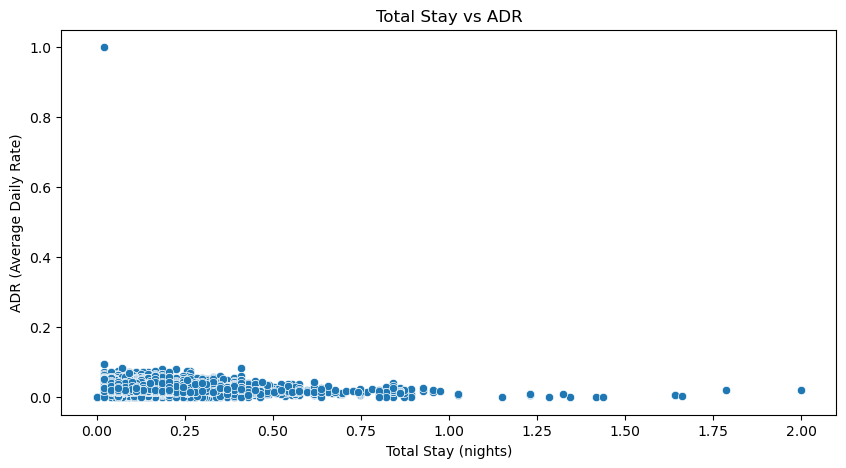

In [167]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data['total_stay'], y=data['adr'])
plt.xlabel('Total Stay (nights)')
plt.ylabel('ADR (Average Daily Rate)')
plt.title('Total Stay vs ADR')
plt.show()


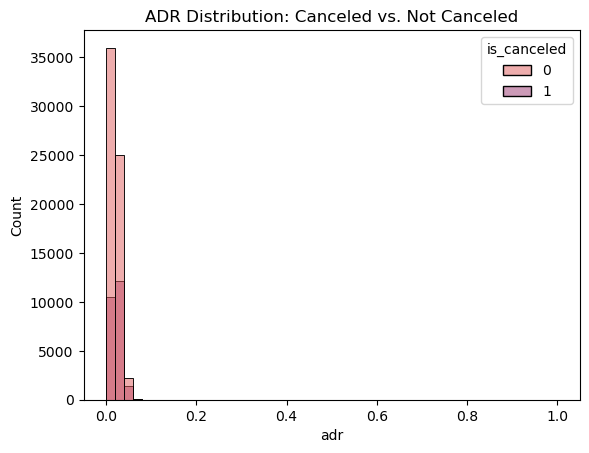

In [181]:
sns.histplot(data=data, x='adr', hue='is_canceled', bins=50,palette='flare')
plt.title('ADR Distribution: Canceled vs. Not Canceled')
plt.show()


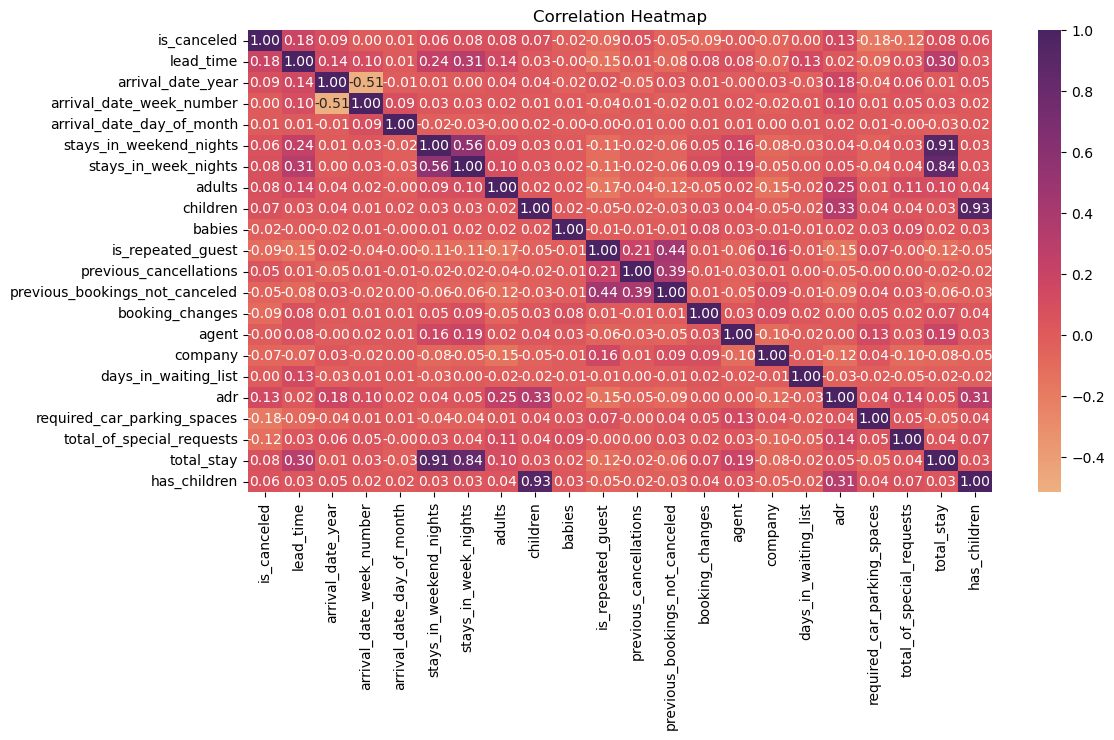

In [189]:
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='flare', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
